In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
# Load the heart disease dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)
df.head(400)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Replace Missing value


In [ ]:
# Show the number of "?" values for each column
print(df.eq('?').sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
 # Replace missing values ('?') with NaN
df.replace('?', np.nan, inplace=True)

In [ ]:
# Convert columns to numeric
df = df.apply(pd.to_numeric)

In [ ]:
# Fill missing values with mean of respective columns
df.fillna(df.mean(), inplace=True)

In [ ]:
# Show the number of "?" values for each column
print(df.eq('nan').sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Identify and remove outliers using z-score

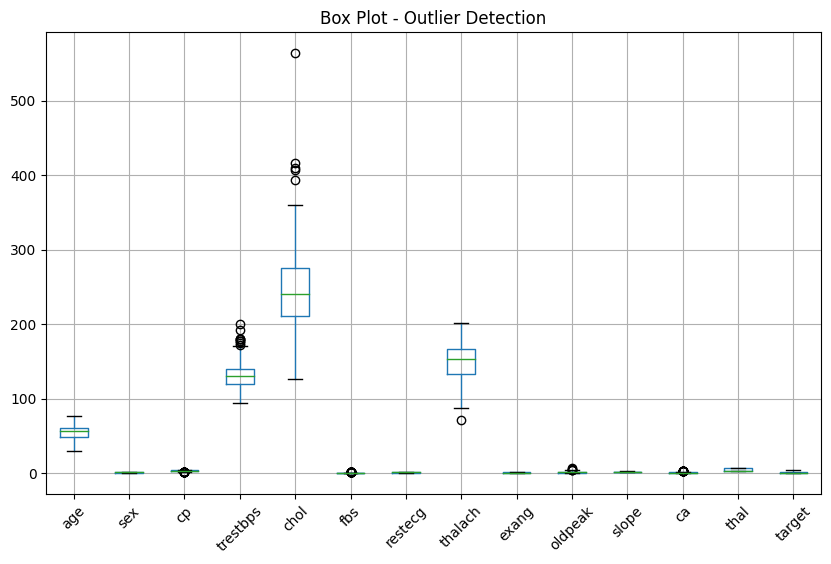

In [ ]:
# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Find and remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Display the modified dataset without outliers
print("Dataset without outliers:")
print(df_no_outliers)

Dataset without outliers:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
295  41.0  1.0  2.0     120.0  157.0  0.0      0.0    182.0    0.0      0.0   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope        ca  tha

In [ ]:
# # Identify and remove outliers using z-score
# from scipy import stats
# z_scores = np.abs(stats.zscore(df))
# outliers = np.where(z_scores > 3)
# print("Outliers:")
# for row, col in zip(outliers[0], outliers[1]):
#   print("Row:", row, "Column:", col, "Value:", df.iloc[row, col])

In [ ]:
# # Remove outliers
# df = df[(z_scores < 3).all(axis=1)]

In [ ]:
# Select columns for features (attributes) and labels (last column)
X = df.iloc[:, :-1].values.astype(float)
y = df.iloc[:, -1].values


In [ ]:
# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reduce dimensionality using PCA (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:

def fuzzy_cmeans_clustering(X, n_clusters, max_iter=100, m=2):
    # Initialize cluster centers randomly
    centers = np.random.rand(n_clusters, X.shape[1])

    # Initialize cluster membership matrix randomly
    membership = np.random.rand(X.shape[0], n_clusters)
    membership = membership / np.sum(membership, axis=1)[:, np.newaxis]

    # Fuzzy C-means clustering
    for _ in range(max_iter):
        # Calculate cluster centers
        centers_prev = centers.copy()

        for j in range(n_clusters):
            membership_j = membership[:, j]
            centers[j] = np.sum((membership_j ** m)[:, np.newaxis] * X, axis=0) / np.sum(membership_j ** m)

        # Calculate cluster membership values
        dist = euclidean_distances(X, centers)
        membership = 1 / (dist ** (2 / (m - 1)))
        membership = membership / np.sum(membership, axis=1)[:, np.newaxis]

        # Check convergence
        if np.allclose(centers, centers_prev):
            break

    return centers, membership


In [ ]:
 def visualize_clusters(X, membership, centers):
     # Assign each sample to the cluster with the highest membership value
     labels = np.argmax(membership, axis=1)

    # Plot the clusters
     plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
     plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
     plt.title("Fuzzy C-means Clustering")
     plt.xlabel("PC1")
     plt.ylabel("PC2")
     plt.show()

In [ ]:
# def display_membership_values(X, membership):
#     # Display membership values for each sample
#     for i, sample in enumerate(X):
#         print("Sample", i + 1, "Membership Values:", membership[i])

In [ ]:
# Display the membership values for each sample
#display_membership_values(X, membership)

In [ ]:
def display_membership_values(X, membership):
    # Display membership values for each sample
    for i, sample in enumerate(X):
        print("Sample", i + 1, "Membership Values:", membership[i])

    # Display the best value from each sample's membership values
    best_values = np.max(membership, axis=1)
    print("\nBest Membership Values:")
    for i, value in enumerate(best_values):
        print("Sample", i + 1, "Best Value:", value)

In [ ]:
def calculate_accuracy(y_true, membership):
    # Assign each cluster to the majority class in labels
    labels = np.argmax(membership, axis=1)
    cluster_to_class = {}

    for cluster in np.unique(labels):
        cluster_samples = y_true[labels == cluster]
        cluster_counts = np.bincount(cluster_samples)
        majority_class = np.argmax(cluster_counts)
        cluster_to_class[cluster] = majority_class

    # Assign cluster labels to samples
    predicted_labels = np.array([cluster_to_class[label] for label in labels])

    # Calculate accuracy
    accuracy = accuracy_score(y_true, predicted_labels)
    return accuracy

In [ ]:
# Set the number of clusters
n_clusters = 10

In [ ]:
# Perform Fuzzy C-means clustering
centers, membership = fuzzy_cmeans_clustering(X, n_clusters)


In [ ]:
# Display the membership values for each sample
display_membership_values(X, membership)

Streaming output truncated to the last 5000 lines.
 0.00798315 0.00271903 0.00129835 0.00121323 0.00459349 0.00572766
 0.00067151 0.00227486 0.00173231 0.00203247 0.00198293 0.00194244
 0.00139081 0.00164412 0.00054543 0.00108871 0.00087072 0.00126456
 0.00906391 0.0006847  0.00492832 0.00207253 0.00216166 0.00090351
 0.00417512 0.0074334  0.00160912 0.00389758 0.00338749 0.00230798
 0.00142368 0.00382084 0.00105612 0.00472135 0.00110435 0.00714621
 0.00234691 0.00225322 0.00530886 0.00309312 0.00200193 0.00158085
 0.00737054 0.00042895 0.01281836 0.0013647  0.00081057 0.00418001
 0.0043933  0.00130052 0.00213068 0.00406019 0.00260006 0.00186045
 0.0012565  0.00374389 0.00566612 0.00232647 0.00345992 0.00517466
 0.0021647  0.00635649 0.00181441 0.00429004 0.00174418 0.00307323
 0.01848764 0.00095289 0.00362575 0.00154284 0.0079187  0.00241154
 0.0010542  0.00439867 0.00399004 0.00226456 0.00327184 0.00170821
 0.00295888 0.00115528 0.00253804 0.00226904 0.00176702 0.00138211
 0.00393862

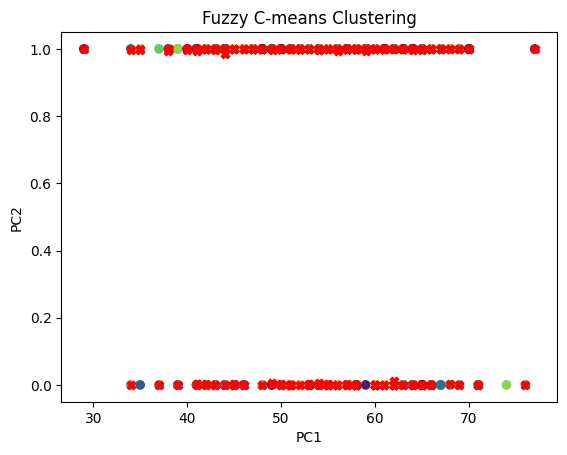

In [ ]:
# Visualize the clusters
visualize_clusters(X, membership, centers)


In [ ]:
# Assign each sample to the cluster with the highest membership value
labels = np.argmax(membership, axis=1)

# Get the indices of samples belonging to Cluster 1 and Cluster 2
cluster1_indices = np.where(labels == 0)[0]
cluster2_indices = np.where(labels == 1)[0]

# Get the samples belonging to Cluster 1 and Cluster 2
samples_cluster1 = X[cluster1_indices]
samples_cluster2 = X[cluster2_indices]

# Print the samples belonging to Cluster 1
print("Samples in Cluster 1:")
for index in cluster1_indices:
    print("Sample", index + 1, "Membership Values:", membership[index])

# Print the samples belonging to Cluster 2
print("\nSamples in Cluster 2:")
for index in cluster2_indices:
    print("Sample", index + 1, "Membership Values:", membership[index])

Samples in Cluster 1:
Sample 160 Membership Values: [9.99966712e-01 9.74316361e-07 2.05612017e-08 2.35044554e-08
 2.14245727e-07 1.03100894e-07 3.21417756e-08 6.18871961e-08
 9.11265516e-08 5.41343601e-08 5.06382510e-08 5.41454195e-07
 1.85047098e-07 5.24115786e-08 1.19971868e-07 3.81101341e-07
 3.62758468e-08 2.90284454e-08 2.61062873e-08 1.97656855e-07
 3.89761139e-07 2.65898629e-07 1.09080016e-07 1.73066230e-08
 1.84096398e-07 5.90239615e-07 3.21590396e-08 9.66260404e-08
 2.77234251e-07 1.86670595e-07 4.27525139e-08 5.32180342e-08
 1.31502136e-07 3.53038784e-08 2.07101007e-07 7.36652974e-08
 1.62714344e-07 3.69024223e-08 4.39179904e-08 6.15756496e-08
 1.89876761e-07 1.17658605e-07 1.25604075e-07 1.10268130e-07
 7.17510803e-08 3.41268112e-07 3.89340995e-08 1.95544067e-08
 2.10439853e-07 7.80746551e-08 7.57214683e-08 5.21218529e-08
 2.16837831e-07 5.22622603e-08 4.63518400e-07 1.43850570e-07
 4.06883204e-08 4.48814046e-08 2.95277412e-07 4.25339802e-07
 2.07165201e-08 1.31174167e-07 4.

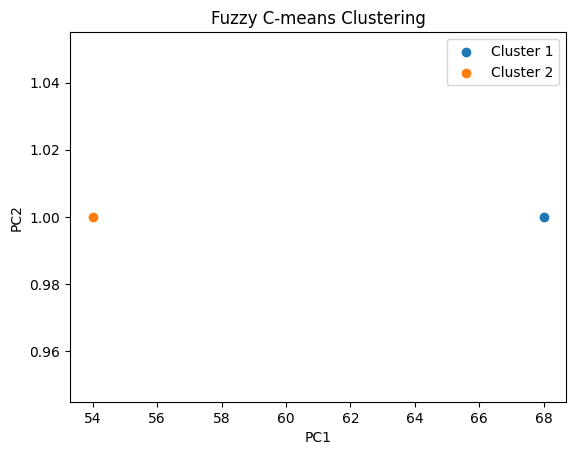

In [ ]:
# Assign each sample to the cluster with the highest membership value
labels = np.argmax(membership, axis=1)

# Get the indices of samples belonging to Cluster 1 and Cluster 2
cluster1_indices = np.where(labels == 0)[0]
cluster2_indices = np.where(labels == 1)[0]

# Get the samples belonging to Cluster 1 and Cluster 2
samples_cluster1 = X[cluster1_indices]
samples_cluster2 = X[cluster2_indices]

# Plot the samples in Cluster 1 and Cluster 2
plt.scatter(samples_cluster1[:, 0], samples_cluster1[:, 1], label='Cluster 1')
plt.scatter(samples_cluster2[:, 0], samples_cluster2[:, 1], label='Cluster 2')

# Add legend and labels
plt.legend()
plt.title('Fuzzy C-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display the scatter plot
plt.show()

In [ ]:
# Calculate accuracy
accuracy = calculate_accuracy(y, membership)
print("Accuracy:", accuracy)  ### no of cluster increase then Accuracy also increase (n=100,acc=68 / n=200,acc=82 / n=251,acc=92 / )

Accuracy: 0.9141914191419142
